# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing data

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Creat my project director as path
path = r"C:\Users\Poory\OneDrive\Desktop\project\Cancer Prediction"

In [3]:
# Change default setting of Jupyter notebook
pd.set_option('display.max_columns' , 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [5]:
df.head()

,State,Year,State_Year,Gender,Leading_Cancer_Sites,Incidence_Counts,Incidence_Age_Adjusted_Rate,Death_Counts,Mortality_Age_Adjusted_Rate,Mortality_Incidence_Age_Adjusted_Rate_Ratio,Population,%_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,%_Low_birthweight,%_Adult_smoking,%_Adults_with_Obesity,%_Physically_Inactive,%_Excessive_Drinking,%_Uninsured,Primary_Care_Physicians_Rate,Mental_Health_Provider_Rate,%_With_Annual_Mammogram,%_Unemployed,%_Children_in_Poverty,Average_Daily_PM2.5,%_Severe_Housing_Problems,%_Adults_with_Diabetes,Median_Household_Income,%_Less_Than_18_Years_of_Age,%_65_and_Over,%_Black,%_American_Indian_&_Alaska_Native,%_Asian,%_Native_Hawaiian/Other_Pacific_Islander,%_Hispanic,%_Non_Hispanic_White,%_Female,%_Rural,Region
0,Alabama,2010,Alabama2010,Male,Prostate,3872,151.08,544,27.67,0.18,2323013,22.66,4.63,4.26,10.23,23.37,33.62,32.80,10.45,17.64,49.16,19.80,60.94,12.07,26.43,3.27,28.40,13.06,37179,23.70,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
1,Alabama,2011,Alabama2011,Male,Prostate,3817,146.45,544,26.61,0.18,2328518,22.66,4.65,4.29,10.35,22.76,35.13,33.18,10.54,17.14,49.16,7.16,62.95,11.20,31.99,3.27,27.41,13.90,36340,23.70,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
2,Alabama,2012,Alabama2012,Male,Prostate,3412,127.56,461,22.07,0.17,2336196,22.53,4.52,4.22,10.55,22.09,35.09,33.14,10.95,17.55,42.61,10.91,62.74,10.46,31.75,12.87,28.32,13.88,36508,23.17,15.38,28.29,0.78,0.65,0.11,3.38,65.86,51.30,66.70,South
3,Alabama,2013,Alabama2013,Male,Prostate,3318,120.95,470,22.13,0.18,2343135,23.28,4.66,4.44,10.55,22.43,35.08,33.55,11.68,17.42,42.93,35.21,60.53,8.57,32.15,12.79,14.47,14.08,37055,22.95,16.03,28.31,0.78,0.65,0.11,3.32,65.89,51.31,67.09,South
4,Alabama,2014,Alabama2014,Male,Prostate,3103,109.17,467,21.30,0.20,2348012,23.28,4.66,4.44,10.58,22.43,35.29,31.79,11.68,16.49,42.86,43.65,60.65,7.67,32.55,12.79,15.13,14.48,38019,22.56,16.49,28.28,0.79,0.72,0.11,3.47,65.60,51.24,67.09,South


#### Here I want to select a subset of data that displays only the incidence count and death count of Lung and bronchus cancer.

In [6]:
df_l = df.loc[(df['Leading_Cancer_Sites']== 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), ['Year', 'Incidence_Counts','Death_Counts']].reset_index(drop=True)

df_l.head()

,Year,Incidence_Counts,Death_Counts
0,2010,4037,3236
1,2011,4018,3164
2,2012,4030,3065
3,2013,3939,3164
4,2014,3962,3117


In [7]:
df_l.shape

(561, 3)

#### This data frame displays the incidence count and death count of lung cancer in each state from 2010 to 2020. I want to group these two variables by year to prepare for further time series analysis.

In [8]:
df2 = df_l.groupby('Year')['Incidence_Counts'].sum().reset_index()
df2

,Year,Incidence_Counts
0,2010,214675
1,2011,215142
2,2012,218011
3,2013,219632
4,2014,221698
5,2015,224924
6,2016,225271
7,2017,227669
8,2018,226789
9,2019,228844


#### here I want to change the Year column data type to pandas datetime and set it as index of the new data frame.

In [9]:
from datetime import datetime

df2['datetime'] = pd.to_datetime(df2['Year'],format='%Y') # Create a datetime column from "Year".
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.
df2.head(11)

,Incidence_Counts
datetime,
2010-01-01,214675
2011-01-01,215142
2012-01-01,218011
2013-01-01,219632
2014-01-01,221698
2015-01-01,224924
2016-01-01,225271
2017-01-01,227669
2018-01-01,226789


In [10]:
df2.columns

Index(['Incidence_Counts'], dtype='object')

In [11]:
type(df2)

pandas.core.frame.DataFrame

### Now, Let's plot our data

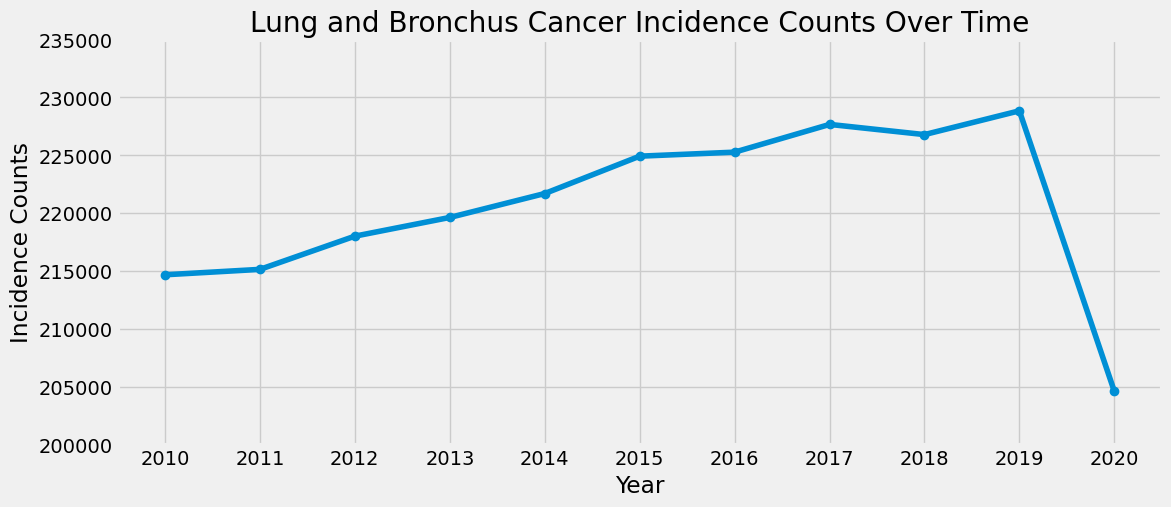

In [12]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 5), dpi= 100)
plt.plot(df2.index, df2['Incidence_Counts'], marker='o')
plt.title('Lung and Bronchus Cancer Incidence Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Incidence Counts')
plt.ylim(200000, 235000)
plt.grid(True)
plt.show()


### In 2020, there was a significant decrease in the number of lung cancer cases. This may be due to the impact of COVID-19, which led to changes in the number of patients and affected the annual report of cancer statistics by the CDC. As a result, I would like to filter my data frame to data from before 2020 in order to minimize this effect.

In [14]:
df2 = df2.loc[df2.index < '2020-01-01']

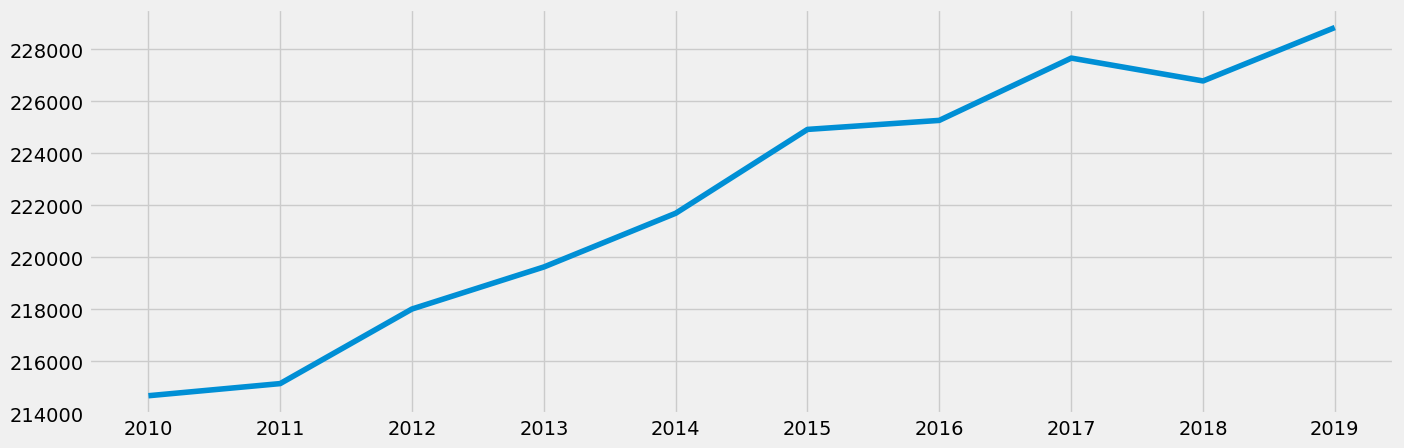

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)

In [16]:
# Check for missing value

df2.isnull().sum() 

Incidence_Counts    0
dtype: int64

In [17]:
# Check for duplicates

dups = df2.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

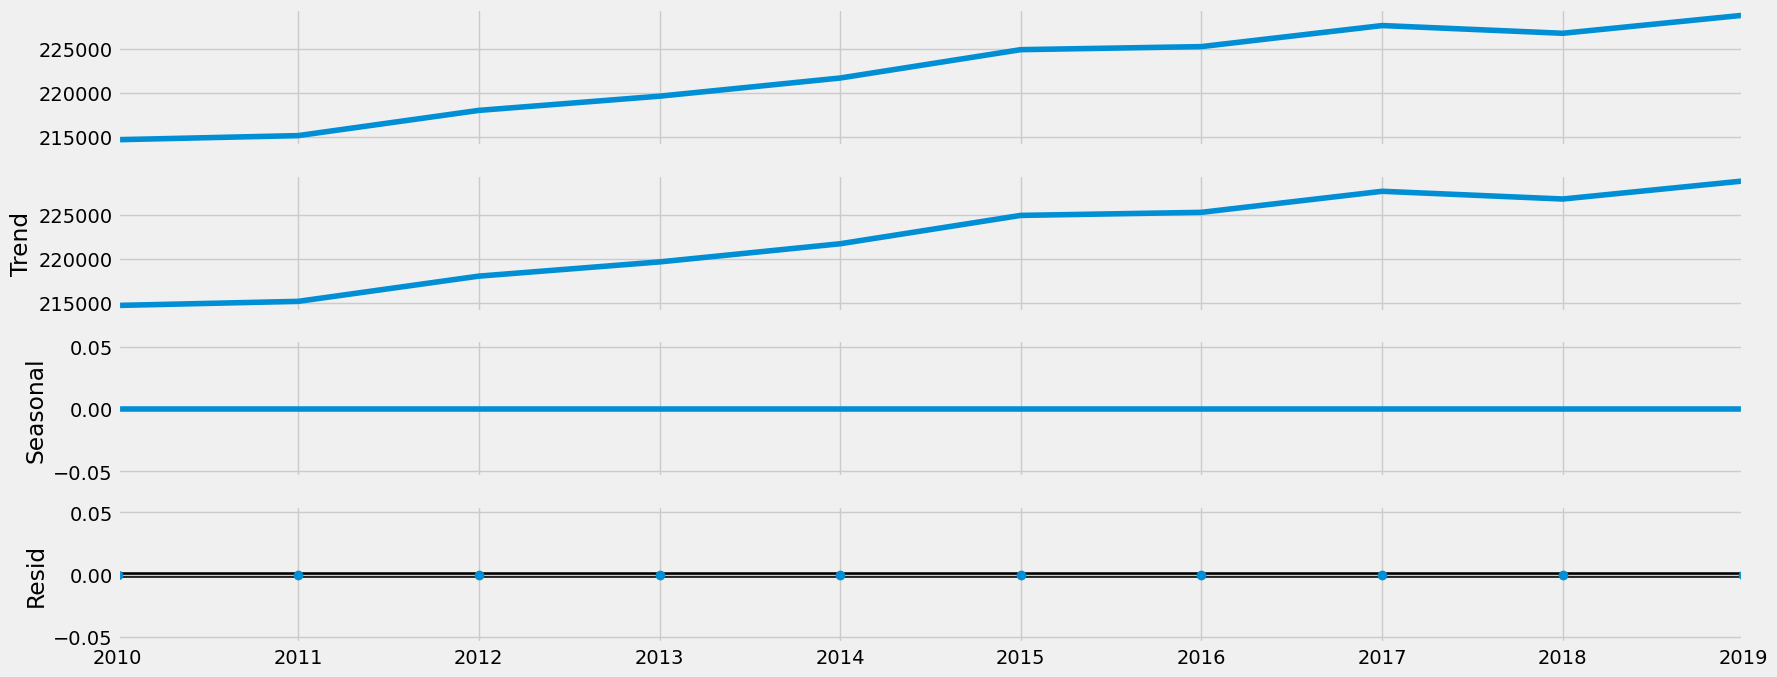

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

### "The above chart provides valuable insights about our data. The first chart displays the overall graph without any decomposition, similar to our initial graph in this notebook.

### The second chart illustrates a trend over the past 10 years. We can observe an upward trend from 2011 to 2019. In the future, we may need to remove this trend to make the data more suitable for time series analysis.

### The third graph depicts seasonality. Given the datetime context of our data, we don't expect any seasonal variations, so we anticipate a flat line on this graph, indicating the absence of seasonality in our data.

### The last graph shows white noise, but thankfully, we don't have any white noise present in our data." 

### Now, Let's check the stationarity of our data using Dicky-Fuller stationarity test:

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Incidence_Counts'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.13
p-value                        0.23
Number of Lags Used            1.00
Number of Observations Used    8.00
Critical Value (1%)           -4.67
Critical Value (5%)           -3.37
Critical Value (10%)          -2.80
dtype: float64


### "After conducting the Dickey-Fuller test, we observed that our test statistic value (-2.12) is bigger than the critical value (5%) (-3.37). This indicates the presence of a unit root and suggests that we cannot reject the null hypothesis of the test. It highlights that our data is non-stationary, necessitating the need to make our data stationary in order to prepare it for time series analysis." 

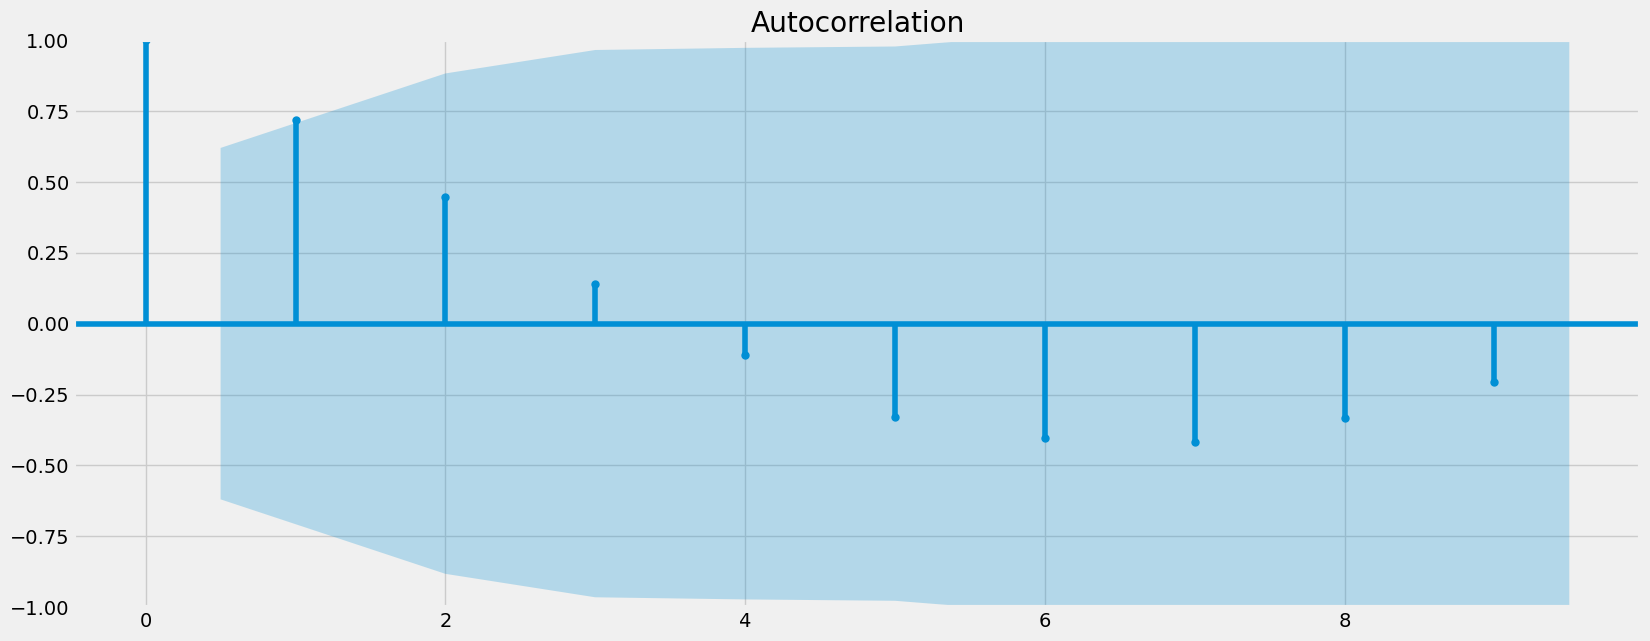

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, we import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

### In our analysis, we examined the autocorrelations in our data. We observed one vertical bar outside the blue shaded area (confidence interval), indicating that there is some autocorrelation present. However, this autocorrelation is not significant, and we can disregard it.

### 5. Stationarizing

In [23]:
data_diff = df2 - df2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, we remove the missing values that came about as a result of the differencing. 

In [25]:
data_diff.head()

,Incidence_Counts
datetime,
2011-01-01,467.00
2012-01-01,2869.00
2013-01-01,1621.00
2014-01-01,2066.00
2015-01-01,3226.00


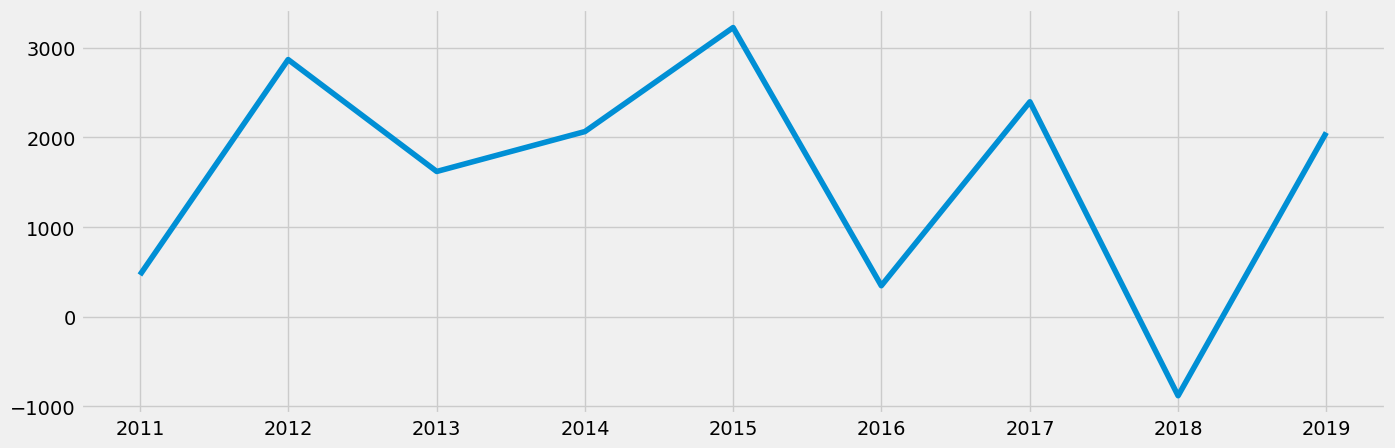

In [26]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
# Run the Dickey-Fuller test again:

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.68
p-value                        0.85
Number of Lags Used            1.00
Number of Observations Used    7.00
Critical Value (1%)           -4.94
Critical Value (5%)           -3.48
Critical Value (10%)          -2.84
dtype: float64


### After one round of differencing, the test statistic is still much Bigger than the critical value (5%). Therefore, we still can't reject the null hypothesis, and our data is still non-stationary.

### In the next step, I plan to perform differencing again. If our data is still not stationary, I will proceed with log transformation.

In [28]:
# Second-order differencing
data_diff2 = data_diff - data_diff.shift(1)
data_diff2.dropna(inplace=True)

# Perform the Dickey-Fuller test again
dickey_fuller(data_diff2['Incidence_Counts'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.07
p-value                        0.00
Number of Lags Used            0.00
Number of Observations Used    7.00
Critical Value (1%)           -4.94
Critical Value (5%)           -3.48
Critical Value (10%)          -2.84
dtype: float64


### Now we can see that finally, the test statistic (-8.07) is significantly smaller than both the 5% and 1% critical values. This means we can confidently reject the null hypothesis of the Dickey-Fuller test. In addition, the p-value is smaller than 0.05 which emphasizes that the test result is significant. As a result, our data doesn't have any unit root and is stationary, making it suitable for further time series analysis. 

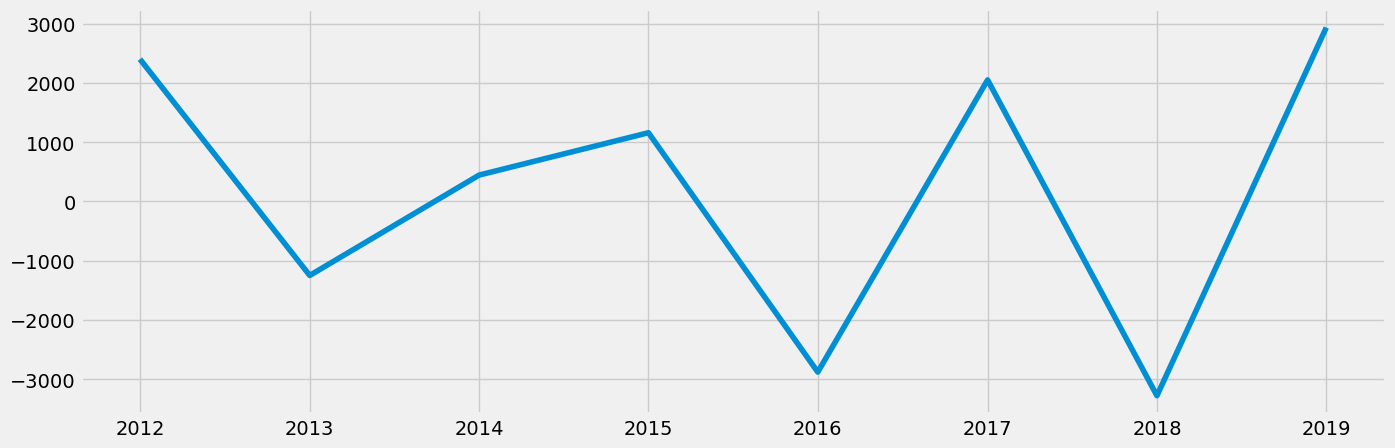

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

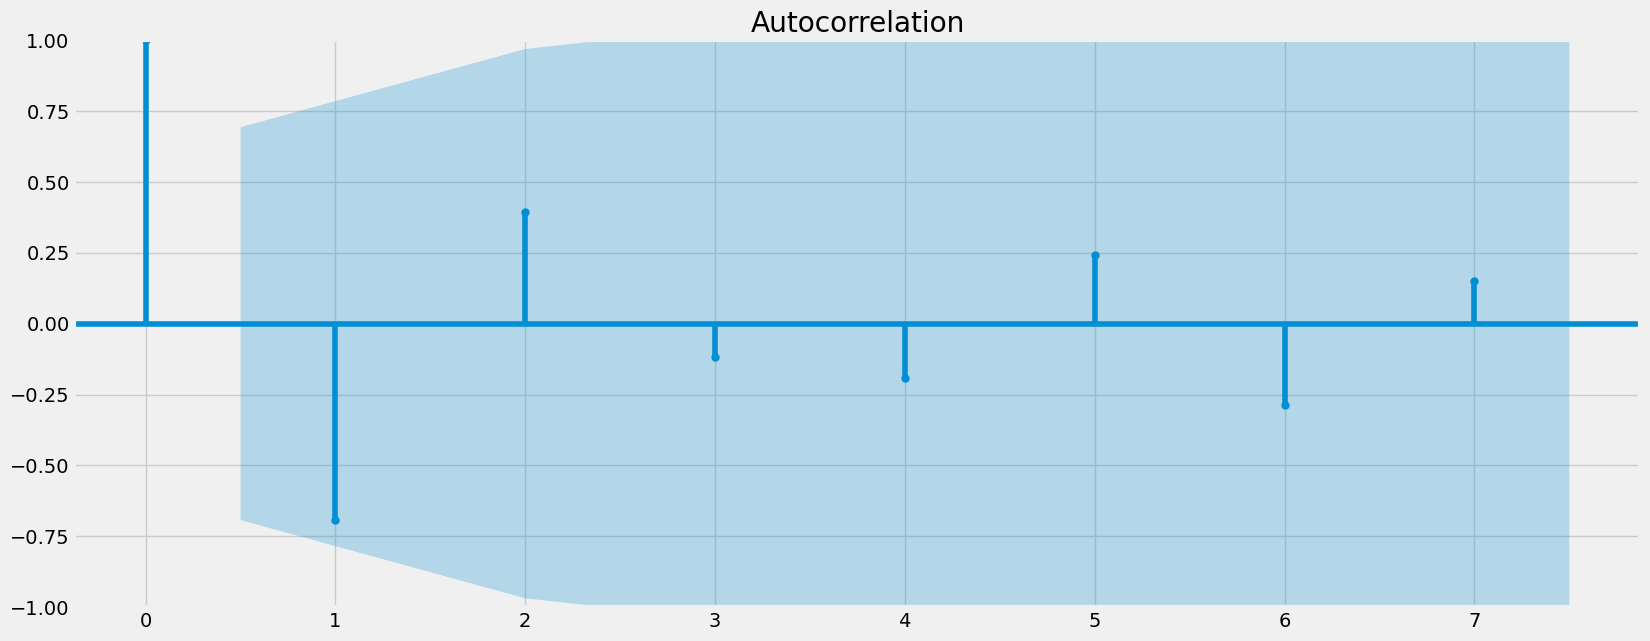

In [30]:
plot_acf(data_diff2)
plt.show()

### Once again, we observe that one vertical bar lies outside of the blue shaded area (confidence interval), indicating some presence of autocorrelation. However, this autocorrelation is not statistically significant, and we can disregard it. 